<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ejercicio-Fechas-Publicación" data-toc-modified-id="Ejercicio-Fechas-Publicación-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ejercicio Fechas Publicación</a></span></li><li><span><a href="#Ejercicio-Tipo-de-Contrato-y-Subtipo-de-Contrato" data-toc-modified-id="Ejercicio-Tipo-de-Contrato-y-Subtipo-de-Contrato-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ejercicio Tipo de Contrato y Subtipo de Contrato</a></span></li><li><span><a href="#Ejercicio-Duración-del-contrato" data-toc-modified-id="Ejercicio-Duración-del-contrato-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ejercicio Duración del contrato</a></span></li></ul></div>

# Ejercicios Limpieza de Datos <a class="tocSkip">

por Mónica Tatiana Gutierrez B

version 0.1, Feb 2021

Parte de la clase Curso de visualización para ciencia de datos en Python

## Taller de Lina Buitrago

In [16]:
import pandas as pd
import numpy as np
import os
os.getcwd()
pd.set_option('display.max_columns', None) #Mostrar todas las columnas
import pyarrow as pa
import pyarrow.parquet as pq
import time

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
df_SECOP = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Visualización de datos en Python/Datos_SECOO_LT.csv', 
                 sep = ',',
                 index_col=0,
                 dtype={
                     'Nit Entidad': str
                 })
df_SECOP.head()

,Entidad,Nit Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,ID del Proceso,Referencia del Proceso,ID del Portafolio,Nombre del Procedimiento,Fase,Fecha de Publicacion del Proceso,Fecha de Ultima Publicación,Precio Base,Modalidad de Contratacion,Duracion,Unidad de Duracion,Adjudicado,ID Adjudicacion,CodigoProveedor,Nombre del Proveedor Adjudicado,NIT del Proveedor Adjudicado,Departamento Proveedor,Ciudad Proveedor,Valor Total Adjudicacion,Tipo de Contrato,Subtipo de Contrato
0,DISPENSARIO MEDICO DE MEDELLÍN,8300396705,Antioquia,Medellín,Nacional,CO1.REQ.375424,021-DGSM-DMMED-2018,CO1.BDOS.366226,PRESTACIÓN DE SERVICIOS MÉDICOS HOSPITALARIOS ...,Presentación de oferta,2018-03-02,2018-03-02,0,Mínima cuantía,30,Dias,Si,CO1.AWD.257257,703875047,E.S.E HOSPITAL LA MISERICORDIA,890982162,Antioquia,Envigado,1500000,Servicios de aprovisionamiento,No Especificado
1,DIRECCION DE SANIDAD EJERCITO DISPENSARIO MEDI...,830039670,Casanare,Yopal,Nacional,CO1.REQ.319641,078-CENACYOPAL-SANIDAD-2018,CO1.BDOS.311763,ODONTOLOGO,Presentación de oferta,2018-01-19,2018-01-19,0,Contratación directa,344,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,No Especificado
2,INDUSTRIA MILITAR,899999044,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1608416,584/2020,CO1.BDOS.1559487,Prestación del Servicio de Evaluaciones Médica...,Presentación de oferta,2020-11-13,2020-11-13,400000000,Contratación régimen especial,7,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,No Especificado
3,MINISTERIO DE VIVIENDA. CIUDAD Y TERRITORIO,900463725,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.306317,MVCT-CD-047-2018,CO1.BDOS.298411,CPSAG LUIS CARLOS ORIZ NOREÑA,Presentación de oferta,2018-01-13,2018-01-12,12100000,Contratación directa,0,ND,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,No Especificado
4,HOSPITAL CENTRAL,830067597,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.728151,PN HOCEN CD 1178 2018,CO1.BDOS.648821,PN HOCEN CD 1178 2018,Presentación de oferta,2019-01-31,2019-01-31,5700675,Contratación directa,150,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,No Especificado


## Ejercicio Fechas Publicación

Teniendo en cuenta que existe una Fecha de Publicación del Proceso y una fecha de última publicación, realice la limpieza de formato de dichas variables. Defina una nueva variable en la que se calcule la diferencia de éstas dos fechas y responda si incluiría las dos fechas dentro de la fuente de datos.

*Utilice estadísticas descriptivas para responder la pregunta*

In [19]:
Dif= (pd.to_datetime(df_SECOP["Fecha de Publicacion del Proceso"],format="%Y/%m/%d")-
      pd.to_datetime(df_SECOP["Fecha de Ultima Publicación"],format="%Y/%m/%d")).dt.days

In [20]:
print(Dif.describe())

count    850953.000000
mean          0.144892
std           0.351992
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
dtype: float64


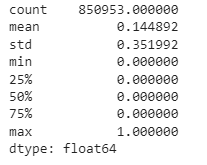

Con los resultados obtenidos, se cncluye que no es necesario incluir ambas variables, ya que la diferencia promedio en dias es bastante pequeña.

## Ejercicio Tipo de Contrato y Subtipo de Contrato
De acuerdo con las variables Contrato y Subcontrato, realice una tabla cruzada y responda ¿Vale la pena dejar ambas variables en la fuente de datos?

In [ ]:
pd.crosstab(df_SECOP["Subtipo de Contrato"],df_SECOP["Tipo de Contrato"])

Tipo de Contrato,27 - Otros servicios,Acuerdo Marco,Alquiler de edificios,Arrendamiento Muebles,Comisión,Compraventa,Concesión,Consultoría,Decreto 092 de 2017,Interventoría,ND,No Especificado,Obra,Seguros,Servicios de aprovisionamiento,Suministros,Ventas de muebles
Subtipo de Contrato,,,,,,,,,,,,,,,,,
No Especificado,42764,963,7552,527,84,42389,104,4159,28466,4723,5229,5,11772,2218,653103,46785,110


Con los resultrado obteneidos en la tabla cruzada, se concluye que la variable "Subtipo de contrato" únicamente contiene el nivel "No especificado", es decir, no esta aportando nada a la base de datos.

## Ejercicio Duración del contrato
Teniendo en cuenta que la duración de los contratos tiene métricas diferentes, encuentre una estrategia para crear una nueva variable en la cuál se encuentre parametrizada la variable de duración del contrato.

In [21]:
df_SECOP['Unidad de Duracion'].value_counts()

Dias     424960
Meses    390226
ND        29277
Años       6490
Name: Unidad de Duracion, dtype: int64

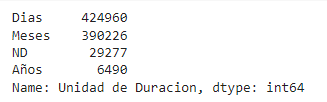

In [ ]:
df_SECOP[['Unidad de Duracion','Duracion']].sample(20)

,Unidad de Duracion,Duracion
599807,Años,4
1042,Meses,4
244372,Meses,9
565711,Dias,255
367257,Meses,4
768490,Meses,4
697030,Dias,330
579471,Dias,316
456067,Dias,285
630988,Dias,313


In [22]:
df_SECOP.loc[df_SECOP["Unidad de Duracion"]=="Dias","Duracion"]=df_SECOP["Duracion"]/30
df_SECOP.loc[df_SECOP["Unidad de Duracion"]=="Años","Duracion"]=df_SECOP["Duracion"]*12

In [23]:
df_SECOP[["Unidad de Duracion","Duracion"]].sample(20)

,Unidad de Duracion,Duracion
137036,Meses,5.000000
433136,Dias,4.333333
311080,Dias,1.933333
744819,ND,0.000000
555104,Meses,8.000000
732967,Dias,3.000000
94457,Meses,2.000000
130647,Meses,3.000000
435682,Meses,6.000000
399862,ND,0.000000


In [24]:
df_SECOP.shape

(850953, 26)

re3.PNG